<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica26_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 26: Regresión Lasso y Ridge**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---


### **📋 Instrucciones**  




#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual <br>
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [ ]:
# Carga el conjunto de datos insurance.csv en un dataframe.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')
print("="*70)
print("Head")
print("="*70)
print(df.head())
print("="*70)
print("Info")
print("="*70)
print(df.info())
print("="*70)
print("Describe")
print("="*70)
print(df.describe())

Head
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Describe
               age          bmi     children       charges
count  1338.0


#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  


📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

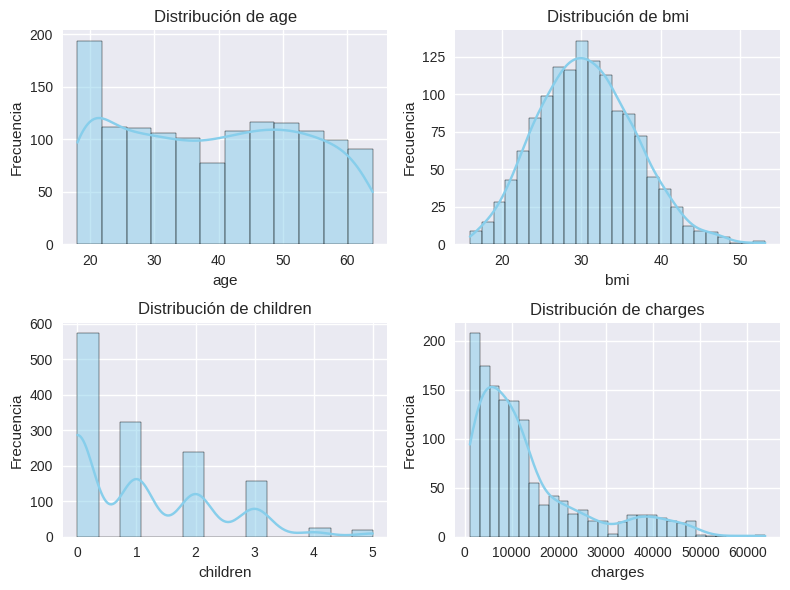

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del estilo
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Identificamos las variables numéricas
numeric_vars = ['age', 'bmi', 'children', 'charges']

# Generamos histogramas
for ax, var in zip(axs.ravel(), numeric_vars):
    sns.histplot(df[var], kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


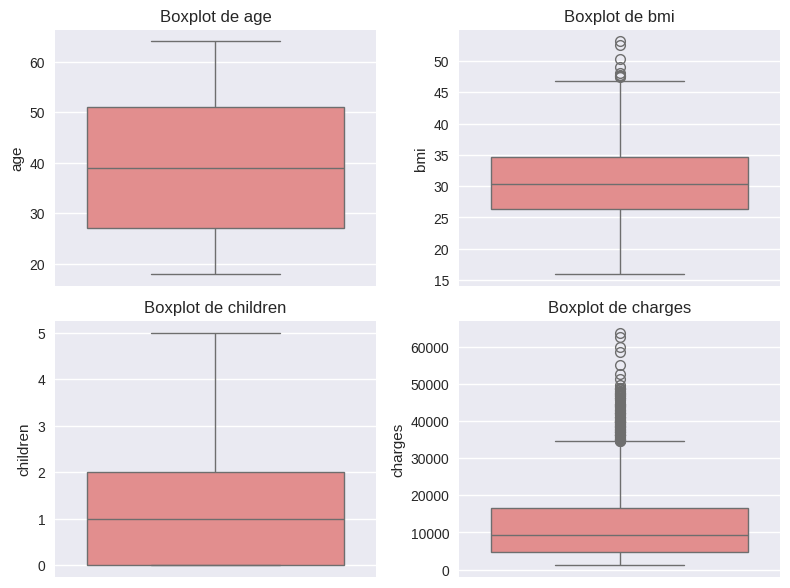

In [ ]:
# Generamos boxplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for ax, var in zip(axs.ravel(), numeric_vars):
    sns.boxplot(y=df[var], color='lightcoral', ax=ax)
    ax.set_title(f'Boxplot de {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


In [ ]:
# Calculamos medidas de tendencia central y dispersión.

for var in numeric_vars:
    print(f"\n{var.upper()}:")
    print(f"  Media: {df[var].mean():.2f}")
    print(f"  Mediana: {df[var].median():.2f}")
    print(f"  Desviación estándar: {df[var].std():.2f}")
    print(f"  Rango: {df[var].min():.2f} - {df[var].max():.2f}")


AGE:
  Media: 39.21
  Mediana: 39.00
  Desviación estándar: 14.05
  Rango: 18.00 - 64.00

BMI:
  Media: 30.66
  Mediana: 30.40
  Desviación estándar: 6.10
  Rango: 15.96 - 53.13

CHILDREN:
  Media: 1.09
  Mediana: 1.00
  Desviación estándar: 1.21
  Rango: 0.00 - 5.00

CHARGES:
  Media: 13270.42
  Mediana: 9382.03
  Desviación estándar: 12110.01
  Rango: 1121.87 - 63770.43



📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.   

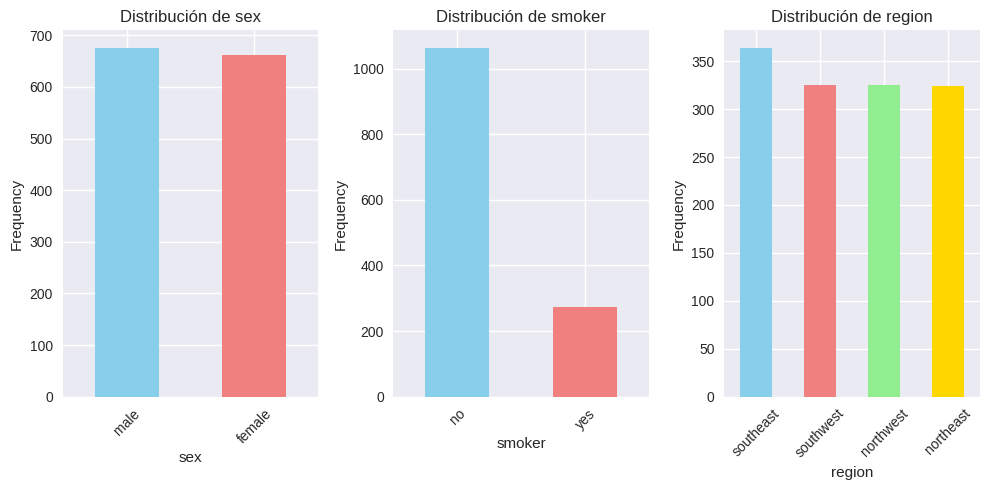

In [ ]:
# Lista de variables categóricas
categorical_vars = ['sex', 'smoker', 'region']

# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i + 1)
    df[var].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Estadísticas de variables categóricas

for var in categorical_vars:
    print(f"\n{var.upper()}:")
    value_counts = df[var].value_counts()
    for category, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")


SEX:
  male: 676 (50.5%)
  female: 662 (49.5%)

SMOKER:
  no: 1064 (79.5%)
  yes: 274 (20.5%)

REGION:
  southeast: 364 (27.2%)
  southwest: 325 (24.3%)
  northwest: 325 (24.3%)
  northeast: 324 (24.2%)


#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  

In [ ]:
# Seleccionamos las variables numéricas
numeric_df = df[['age', 'bmi', 'children', 'charges']]

# Calculamos la matriz de correlación
correlation_matrix = numeric_df.corr()

print("=" * 41)
print("        Matriz de correlación")
print("=" * 41)
print(correlation_matrix.round(3))



        Matriz de correlación
            age    bmi  children  charges
age       1.000  0.109     0.042    0.299
bmi       0.109  1.000     0.013    0.198
children  0.042  0.013     1.000    0.068
charges   0.299  0.198     0.068    1.000



✅ Generar un **mapa de calor** para visualizar relaciones.  

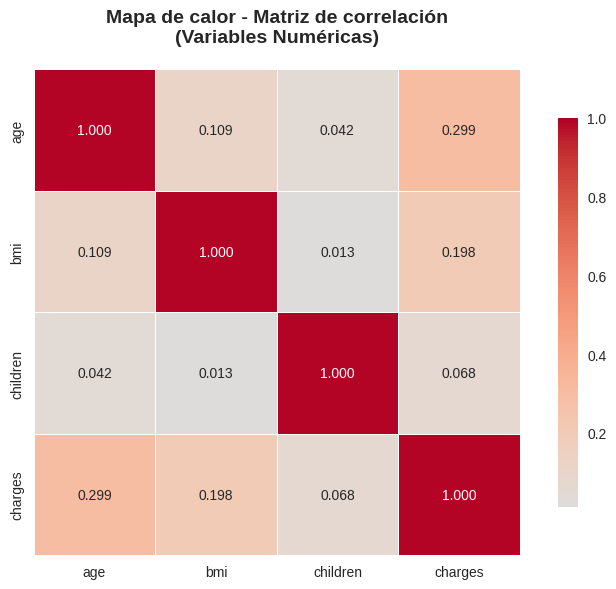

In [ ]:
# Mapa de calor
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de calor - Matriz de correlación\n(Variables Numéricas)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  

La que más se relaciona es "age", luego "bmi" y por último "children".


#### **🔹 Paso 4: Preprocesamiento**  




🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  


In [ ]:
from sklearn.impute import SimpleImputer

# Separamos variables numéricas y categóricas
numeric_vars = ['age', 'bmi', 'children', 'charges']
categorical_vars = ['sex', 'smoker', 'region']

# Imputador para numéricas (sustituye NaN con la media)
imputer_num = SimpleImputer(strategy='mean')
df[numeric_vars] = imputer_num.fit_transform(df[numeric_vars])

# Imputador para categóricas (sustituye NaN con el valor más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_vars] = imputer_cat.fit_transform(df[categorical_vars])

print("Imputación realizada")
print(df.isnull().sum())


Imputación realizada
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


🔧 **Tareas:**  
2. Codificar variables categóricas con `OneHotEncoder`.  


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Aplicamos OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_vars])

# Convertimos a DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars))

# Unimos con variables numéricas
df_encoded = pd.concat([df[numeric_vars], encoded_df], axis=1)

print("Codificación aplicada")
print(df_encoded.head())


Codificación aplicada
    age     bmi  children      charges  sex_male  smoker_yes  \
0  19.0  27.900       0.0  16884.92400       0.0         1.0   
1  18.0  33.770       1.0   1725.55230       1.0         0.0   
2  28.0  33.000       3.0   4449.46200       1.0         0.0   
3  33.0  22.705       0.0  21984.47061       1.0         0.0   
4  32.0  28.880       0.0   3866.85520       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


🔧 **Tareas:**  
3. Estandarizar variables numéricas con `StandardScaler`.  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalamos solo las columnas numéricas
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_vars] = scaler.fit_transform(df_scaled[numeric_vars])

print("Escalamiento aplicado")
print(df_scaled.head())


Escalamiento aplicado
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  0.298584       0.0         1.0   
1 -1.509965  0.509621 -0.078767 -0.953689       1.0         0.0   
2 -0.797954  0.383307  1.580926 -0.728675       1.0         0.0   
3 -0.441948 -1.305531 -0.908614  0.719843       1.0         0.0   
4 -0.513149 -0.292556 -0.908614 -0.776802       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


🔧 **Tareas:**  

✅ Verificar que el dataset transformado no tenga valores nulos.  

In [ ]:
print("Verificación final de valores nulos:\n")
print(df_scaled.isnull().sum())


Verificación final de valores nulos:

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  



#### **Lasso**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1`).  

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Separamos X e y a partir de df_scaled
X = df_scaled.drop(columns=['charges'])
y = df_scaled['charges']

# División 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos y ajustamos Lasso
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Predecimos sobre el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso entrenado. Formas:")
print(" X_train:", X_train.shape, " X_test:", X_test.shape)
print(" y_train:", y_train.shape, " y_test:", y_test.shape)
print(" Primeras 10 predicciones (Lasso):", np.round(y_pred_lasso[:10], 4))


Lasso entrenado. Formas:
 X_train: (1070, 8)  X_test: (268, 8)
 y_train: (1070,)  y_test: (268,)
 Primeras 10 predicciones (Lasso): [-0.2525 -0.3212  1.3666 -0.2315  0.7909 -0.1933 -0.6527  0.1706 -0.5887
 -0.1533]


#### **Lasso**  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculamos MSE (Mean Squared Error)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculamos R² (coeficiente de determinación)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Rendimiento del modelo Lasso (alpha=0.1):")
print(f"  MSE: {mse_lasso:.4f}")
print(f"  R²: {r2_lasso:.4f}")


Rendimiento del modelo Lasso (alpha=0.1):
  MSE: 0.3355
  R²: 0.6833


#### **Lasso**  
3. Analizar los coeficientes para identificar variables importantes.  


Coeficientes del modelo Lasso:
smoker_yes          1.329559
age                 0.198729
bmi                 0.073890
children            0.000000
sex_male            0.000000
region_northwest   -0.000000
region_southeast    0.000000
region_southwest   -0.000000
dtype: float64


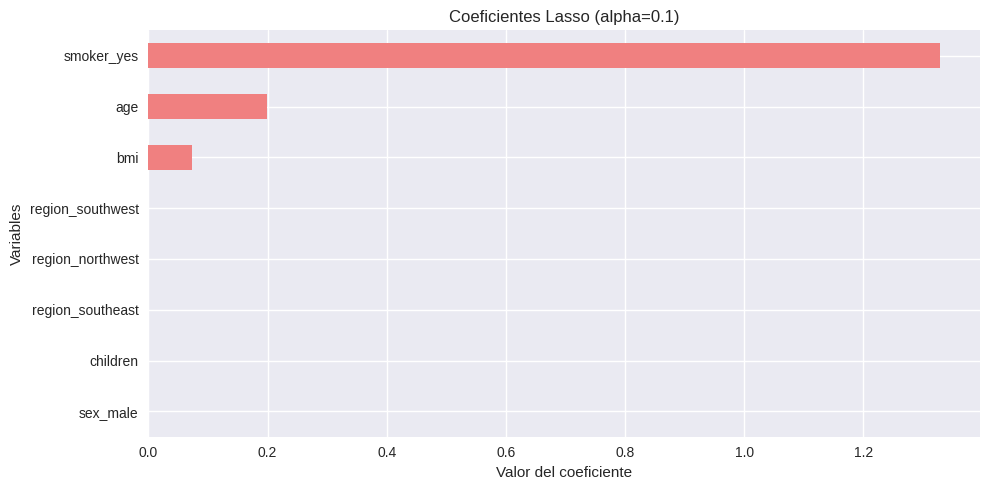

In [ ]:
# Obtenemos nombres de columnas
feature_names = X_train.columns

# Creamos un DataFrame con coeficientes
coef_lasso = pd.Series(lasso_model.coef_, index=feature_names)

print("Coeficientes del modelo Lasso:")
print(coef_lasso.sort_values(ascending=False))

# Graficamos los coeficientes
plt.figure(figsize=(10, 5))
coef_lasso.sort_values().plot(kind='barh', color='lightcoral')
plt.title("Coeficientes Lasso (alpha=0.1)")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


#### **Ridge**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=1.0`).  

In [ ]:
from sklearn.linear_model import Ridge

# Instanciamos y ajustamos Ridge
ridge_model = Ridge(alpha=1.0, max_iter=10000)
ridge_model.fit(X_train, y_train)

# Predecimos sobre el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge entrenado. Formas:")
print(" X_train:", X_train.shape, " X_test:", X_test.shape)
print(" y_train:", y_train.shape, " y_test:", y_test.shape)
print(" Primeras 10 predicciones (Ridge):", np.round(y_pred_ridge[:10], 4))


Ridge entrenado. Formas:
 X_train: (1070, 8)  X_test: (268, 8)
 y_train: (1070,)  y_test: (268,)
 Primeras 10 predicciones (Ridge): [-0.3538 -0.5104  1.9383 -0.3127  1.1237 -0.1964 -1.0794  0.3014 -1.0037
 -0.1672]


#### **Ridge**  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  

In [ ]:
# Calculamos MSE (Mean Squared Error)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculamos R² (coeficiente de determinación)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Rendimiento del modelo Ridge (alpha=1.0):")
print(f"  MSE: {mse_ridge:.4f}")
print(f"  R²: {r2_ridge:.4f}")

Rendimiento del modelo Ridge (alpha=1.0):
  MSE: 0.2296
  R²: 0.7833


#### **Ridge**  
3. Analizar los coeficientes para identificar variables importantes.  


Coeficientes del modelo Ridge:
smoker_yes          1.942478
age                 0.297656
bmi                 0.169505
children            0.042390
sex_male           -0.000879
region_northwest   -0.030247
region_southeast   -0.053117
region_southwest   -0.066326
dtype: float64


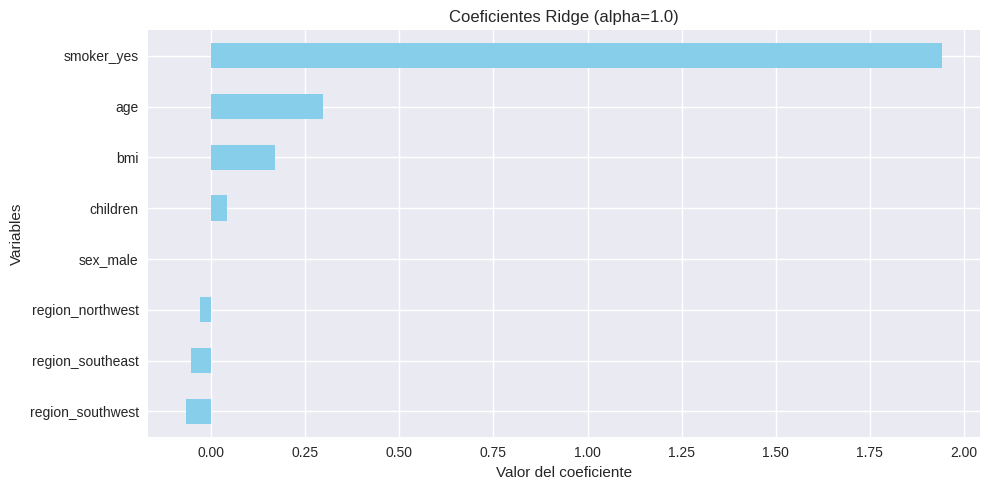

In [ ]:
# Creamos un DataFrame con coeficientes
coef_ridge = pd.Series(ridge_model.coef_, index=X_train.columns)

print("Coeficientes del modelo Ridge:")
print(coef_ridge.sort_values(ascending=False))

# Graficamos los coeficientes
plt.figure(figsize=(10, 5))
coef_ridge.sort_values().plot(kind='barh', color='skyblue')
plt.title("Coeficientes Ridge (alpha=1.0)")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  

Se nota que ambos modelos se ajustan bien a los datos, pero me parece que el modelo de Ridge tiene un R2 ligeramente superior al de Lasso ya que como se observa en algunas gráficas algunos valores no existen.


- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  
Children, sex_male, region_northwest, region_southeast y region_southwest, porque no tienen una relación tan fuerte, así que no afectan a la predicción.


#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  



📉 **Para Lasso, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  




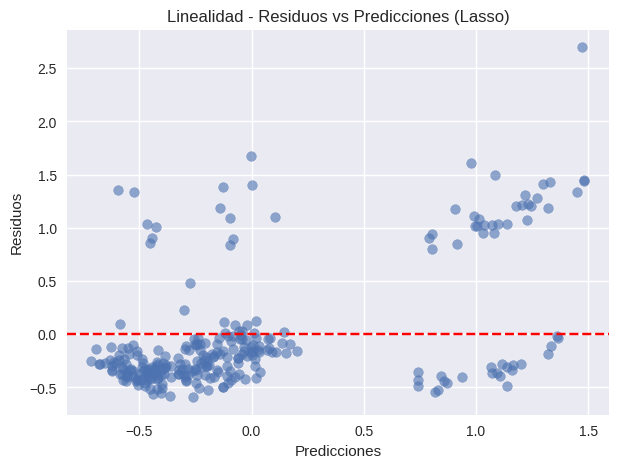

In [ ]:
# Predicciones y residuos
y_pred_lasso = lasso_model.predict(X_test)
residuals_lasso = y_test - y_pred_lasso

# Gráfico de residuos vs predicciones
plt.figure(figsize=(7,5))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Linealidad - Residuos vs Predicciones (Lasso)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


📉 **Para Lasso, verificar:**  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  




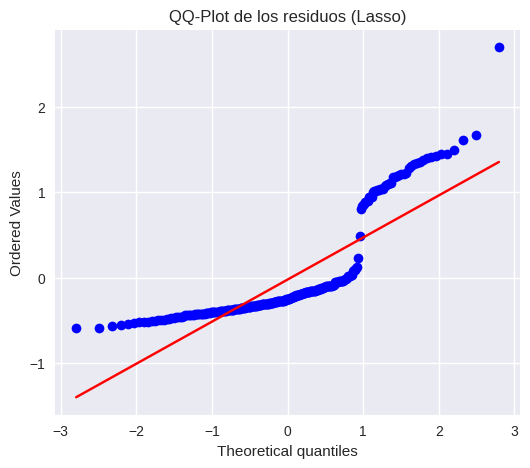

Test Shapiro-Wilk (Lasso):
  Estadístico: 0.7115
  p-value: 0.0000


In [ ]:
import scipy.stats as stats
import seaborn as sns

# QQ-Plot
plt.figure(figsize=(6,5))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title("QQ-Plot de los residuos (Lasso)")
plt.show()

# Test de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(residuals_lasso)
print("Test Shapiro-Wilk (Lasso):")
print(f"  Estadístico: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")


📉 **Para Lasso, verificar:**  
3. **Homocedasticidad** (test de Breusch-Pagan).  


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Para Breusch-Pagan debemos pasar residuos y predicciones o variables explicativas
X_test_const = sm.add_constant(y_pred_lasso)

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_lasso, X_test_const)

print("Test Breusch-Pagan (Lasso):")
print(f"  Estadístico BP: {bp_stat:.4f}")
print(f"  p-value: {bp_pvalue:.4f}")


Test Breusch-Pagan (Lasso):
  Estadístico BP: 62.1909
  p-value: 0.0000


📉 **Para Lasso, verificar:**  
4. **Multicolinealidad** (VIF > 10 indica problema).  



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculamos VIF para cada columna del dataset ya escalado y codificado
vif_data = pd.DataFrame()
vif_data["Variable"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

print("VIF - Factor de Inflación de Varianza:")
print(vif_data)


VIF - Factor de Inflación de Varianza:
           Variable       VIF
0               age  1.332820
1               bmi  1.222847
2          children  1.012999
3           charges  3.684075
4          sex_male  1.710174
5        smoker_yes  3.952361
6  region_northwest  1.302666
7  region_southeast  1.486788
8  region_southwest  1.326170


📉 **Para Ridge, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  




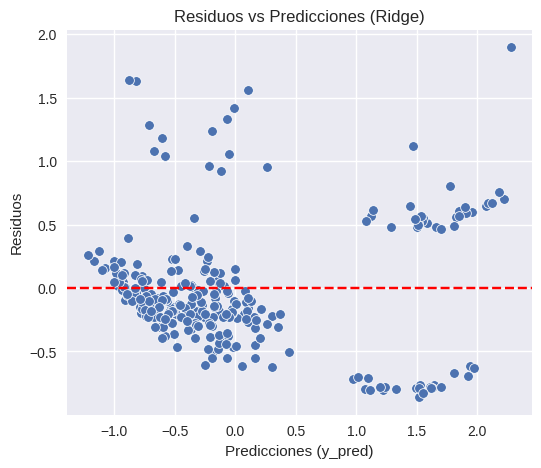

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones (Ridge)")
plt.xlabel("Predicciones (y_pred)")
plt.ylabel("Residuos")
plt.show()


📉 **Para Ridge, verificar:**
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  




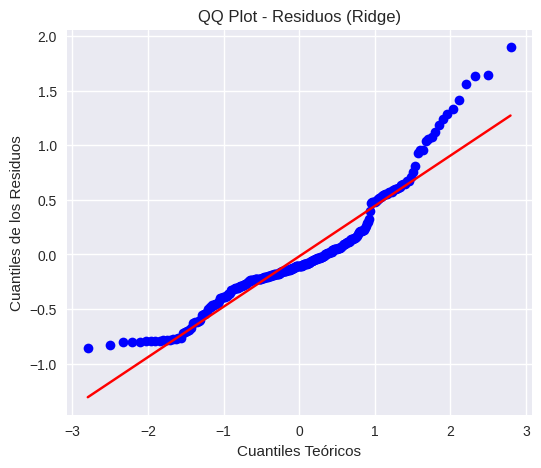

In [ ]:
plt.figure(figsize=(6,5))
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title("QQ Plot - Residuos (Ridge)")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")
plt.show()


📉 **Para Ridge, verificar:**  
3. **Homocedasticidad** (test de Breusch-Pagan).  


In [ ]:
from scipy.stats import shapiro

shapiro_stat, shapiro_p = shapiro(residuals_ridge)

print("Shapiro-Wilk Test (Ridge):")
print(f"  Estadístico: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("→ No se rechaza H0: los residuos parecen normales")
else:
    print("→ Se rechaza H0: los residuos no siguen una distribución normal")

Shapiro-Wilk Test (Ridge):
  Estadístico: 0.9126
  p-value: 0.0000
→ Se rechaza H0: los residuos no siguen una distribución normal


📉 **Para Ridge, verificar:**  
4. **Multicolinealidad** (VIF > 10 indica problema).  



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculamos VIF para todas las variables en df_scaled
vif_data = pd.DataFrame()
vif_data["Variable"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

print("VIF - Factor de Inflación de la Varianza:")
print(vif_data)

VIF - Factor de Inflación de la Varianza:
           Variable       VIF
0               age  1.332820
1               bmi  1.222847
2          children  1.012999
3           charges  3.684075
4          sex_male  1.710174
5        smoker_yes  3.952361
6  region_northwest  1.302666
7  region_southeast  1.486788
8  region_southwest  1.326170


📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
Al analizar ambos modelos de regresión podemos observar que se cumple linealidad de forma aceptable; en las gráficas vemos que la distribución no tiene curvas muy pronunciadas. La normalidad de los residuos, los QQ-Plots y la prueba de Shapiro-Wilk muestran que se aproximan a una distribución normal.

- Si hay heterocedasticidad, ¿cómo podría solucionarse?  
En el test de Breusch-Pagan se observa que hay heterocedasticidad, porque la varianza de los residuos no es constante a lo largo de las predicciones, ya que el p <= 0,05. Se podría solucionar si se transforma la variable independiente, por ejemplo usando el método de logaritmos.


#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

¿Qué modelo es más interpretable?

El modelo de Lasso porque algunos valores se vuelven ceros, así podemos notar las variables más relevantes para la variable que es nuestro objetivo: charges.

¿Cuál reduce mejor el sobreajuste?

Considero mejor para reducir el sobreajuste a Ridge, porque no elimina todos los datos, como se observa en las gráficas.

¿Qué variables son más importantes?

smoker_yes y bmi tiene los coeficientes más altos, lo que las hace más relevantes. Todas contribuyen al modelo pero en diferente grado.



### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  